## Making networks with Twitter data

In [15]:
import json


In [16]:
#read the files from directory
file = open('list.PyTennessee.json')

#create an empty list
pairs = []

data = json.load(file)

for item in data['users']:
    pairs.append(('PyTennessee',str(item['screen_name'])))
    


In [17]:
pairs[:20]

[('PyTennessee', 'LampPostGroup'),
 ('PyTennessee', 'octovisinc'),
 ('PyTennessee', 'nashdevcal'),
 ('PyTennessee', 'hsvpy'),
 ('PyTennessee', 'bvalentine615'),
 ('PyTennessee', 'awebneck'),
 ('PyTennessee', 'ascot21'),
 ('PyTennessee', 'pyohio'),
 ('PyTennessee', 'CalEvans'),
 ('PyTennessee', 'nodevember'),
 ('PyTennessee', 'pythonanywhere'),
 ('PyTennessee', 'whitacre'),
 ('PyTennessee', 'adafruit'),
 ('PyTennessee', 'MosaikGlobal'),
 ('PyTennessee', 'nostarch'),
 ('PyTennessee', 'Spotify'),
 ('PyTennessee', 'newrelic'),
 ('PyTennessee', 'JuiceAnalytics'),
 ('PyTennessee', 'SimonSolutions'),
 ('PyTennessee', 'waypaverlabs')]

In [18]:
pairs[-20:]

[('PyTennessee', 'CoderFaire'),
 ('PyTennessee', 'enthought'),
 ('PyTennessee', 'PyNashLadies'),
 ('PyTennessee', 'studionow'),
 ('PyTennessee', 'pycoders'),
 ('PyTennessee', 'coop_geo'),
 ('PyTennessee', 'gvanrossum'),
 ('PyTennessee', 'raymondh'),
 ('PyTennessee', 'geography76'),
 ('PyTennessee', 'pycon'),
 ('PyTennessee', 'mitsuhiko'),
 ('PyTennessee', 'MemphisPython'),
 ('PyTennessee', 'ThePSF'),
 ('PyTennessee', 'nashdevbot'),
 ('PyTennessee', 'planetpython'),
 ('PyTennessee', 'hacknashville'),
 ('PyTennessee', 'byeliad'),
 ('PyTennessee', 'egdelwonk'),
 ('PyTennessee', 'R_Macy'),
 ('PyTennessee', 'jasonamyers')]

In [20]:
import operator
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(),key=operator.itemgetter(1))
    

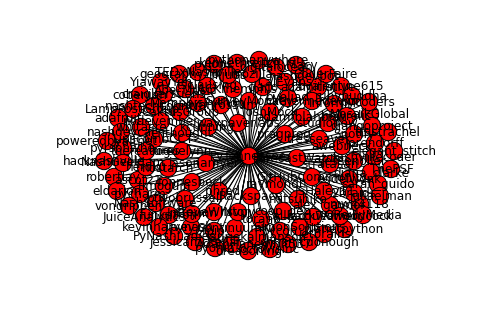

In [21]:
g = nx.Graph()
g.add_edges_from(pairs)

nx.draw(g, with_labels=True)

In [22]:
#how connected is the network?
print('very connected')

very connected


In [23]:
#centrality : which nodes have the highest /lowest degree centrality

degree_cent = nx.degree_centrality(g)
degree_sorted = centrality_sort(degree_cent)

print('----------------------Degree Centrality--------------------------')
print('Highest degree:',degree_sorted[-5:])
print('\n')

print('Lowest degree:',degree_sorted[:5])

----------------------Degree Centrality--------------------------
Highest degree: [('eldarion', 0.008620689655172414), ('CalEvans', 0.008620689655172414), ('pycoders', 0.008620689655172414), ('jorendorff', 0.008620689655172414), ('PyTennessee', 1.0)]


Lowest degree: [('CaktusGroup', 0.008620689655172414), ('HACKmemphis', 0.008620689655172414), ('ptwobrussell', 0.008620689655172414), ('kennethreitz', 0.008620689655172414), ('_phred', 0.008620689655172414)]


In [24]:
#betweenness centrality : which nodes have the highest /lowest betweenness centrality

between_cent = nx.betweenness_centrality(g)
between_sorted = centrality_sort(between_cent)

print('----------------------Betwenness Centrality--------------------------')
print('Highest degree:',between_sorted[-5:])
print('\n')

print('Lowest degree:',between_sorted[:5])

----------------------Betwenness Centrality--------------------------
Highest degree: [('eldarion', 0.0), ('CalEvans', 0.0), ('pycoders', 0.0), ('jorendorff', 0.0), ('PyTennessee', 0.9999999999999999)]


Lowest degree: [('CaktusGroup', 0.0), ('HACKmemphis', 0.0), ('ptwobrussell', 0.0), ('kennethreitz', 0.0), ('_phred', 0.0)]


In [25]:
#closenness centrality : which nodes have the highest and lowest closeness centrality

closeness_cent = nx.closeness_centrality(g)
closeness_sorted = centrality_sort(closeness_cent)

print('----------------------Closenness Centrality--------------------------')
print('Highest degree:',closeness_sorted[-5:])
print('\n')

print('Lowest degree:',closeness_sorted[:5])

----------------------Closenness Centrality--------------------------
Highest degree: [('eldarion', 0.5021645021645021), ('CalEvans', 0.5021645021645021), ('pycoders', 0.5021645021645021), ('jorendorff', 0.5021645021645021), ('PyTennessee', 1.0)]


Lowest degree: [('CaktusGroup', 0.5021645021645021), ('HACKmemphis', 0.5021645021645021), ('ptwobrussell', 0.5021645021645021), ('kennethreitz', 0.5021645021645021), ('_phred', 0.5021645021645021)]


In [27]:
highest_degree = [node[0] for node in degree_sorted[-20:]]

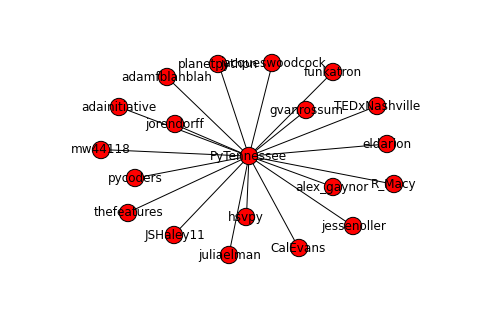

In [28]:
#create a subgraph
sub = g.subgraph(highest_degree)
nx.draw(sub,with_labels=True)

In [29]:
lowest_degree = [node[0] for node in degree_sorted[:20]]

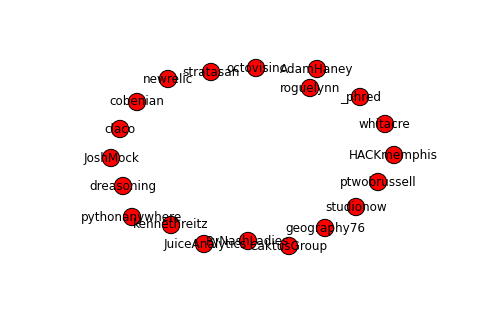

In [30]:
sub_low = g.subgraph(lowest_degree)
nx.draw(sub_low,with_labels=True)

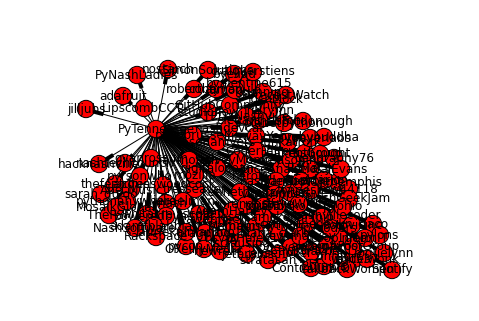

In [32]:
# create a digraph
d = nx.DiGraph()

d.add_edges_from(pairs)
nx.draw(d,with_labels=True)

In [33]:
#get the in_degree_centrality , and out_degree_centrality

in_degree_centrality = nx.in_degree_centrality(d)
in_degree_sorted = centrality_sort(in_degree_centrality)

print('---------------------- in degree Centrality--------------------------')
print('Highest degree:',in_degree_sorted[-5:])
print('\n')

print('Lowest degree:',in_degree_sorted[:5])


#out_degree centrality
out_degree_centrality = nx.out_degree_centrality(d)
out_degree_sorted = centrality_sort(out_degree_centrality)

print('---------------------- out degree Centrality--------------------------')
print('Highest degree:',out_degree_sorted[-5:])
print('\n')

print('Lowest degree:',out_degree_sorted[:5])

---------------------- in degree Centrality--------------------------
Highest degree: [('alex_gaynor', 0.008620689655172414), ('eldarion', 0.008620689655172414), ('CalEvans', 0.008620689655172414), ('pycoders', 0.008620689655172414), ('jorendorff', 0.008620689655172414)]


Lowest degree: [('PyTennessee', 0.0), ('CaktusGroup', 0.008620689655172414), ('HACKmemphis', 0.008620689655172414), ('ptwobrussell', 0.008620689655172414), ('kennethreitz', 0.008620689655172414)]
---------------------- out degree Centrality--------------------------
Highest degree: [('eldarion', 0.0), ('CalEvans', 0.0), ('pycoders', 0.0), ('jorendorff', 0.0), ('PyTennessee', 1.0)]


Lowest degree: [('CaktusGroup', 0.0), ('HACKmemphis', 0.0), ('ptwobrussell', 0.0), ('kennethreitz', 0.0), ('_phred', 0.0)]


In [39]:
highest_in_degree = [node[0] for node in in_degree_sorted[-20:]]

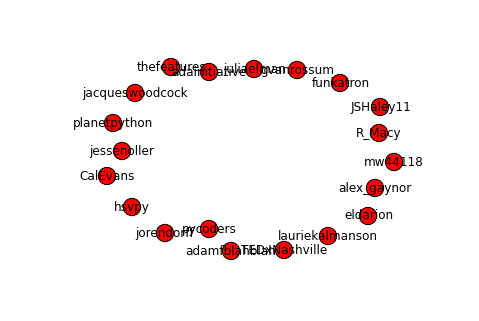

In [41]:
sub = d.subgraph(highest_in_degree)
nx.draw(sub,with_labels=True)

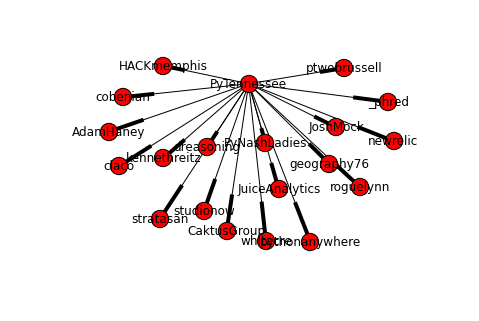

In [42]:
lowest_in_degree = [node[0] for node in in_degree_sorted[:20]]
sub1 = d.subgraph(lowest_in_degree)
nx.draw(sub1,with_labels=True)

In [44]:
highest_out_degree = [node[0] for node in out_degree_sorted[-20:]]
lowest_out_degree = [node[0] for node in out_degree_sorted[:20]]

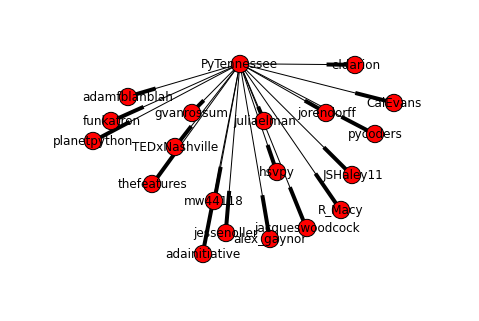

In [45]:
#plot highest out degree
sub = d.subgraph(highest_out_degree)
nx.draw(sub,with_labels=True)

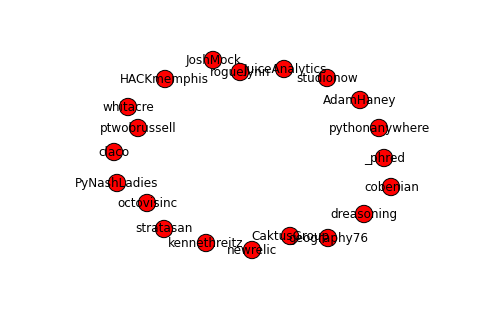

In [48]:
#plot lowest out degree
sub12 = d.subgraph(lowest_out_degree)
nx.draw(sub12,with_labels=True)